### The Program that generated the data used in this notebook as a threshold of 2 (instead of 5)

In [ ]:
import matplotlib.pyplot as plt
import scipy.sparse
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, recall_score, f1_score
from notebooks.variable_selection.MosesEstimator import *
from notebooks.variable_selection.util import *

In [7]:
from notebooks.variable_selection.util import load_bmm_files
seeds, data_dfs, net_dfs, feats = load_bmm_files("data/bmm_data_thr_2")
seeds

[82, 91, 13, 92, 64, 10, 28, 55, 96, 97]

### No Background Penalty, complexity ratio = 10

In [11]:
base_auc = []
with open("data/bmm_data_thr_2/base_auc.txt", "r") as fp:
    base_auc = [float(i) for i in fp.readline().strip().split(',')]

base_auc

[0.597319032590167,
 0.609970514817979,
 0.604939947222976,
 0.604077825159915,
 0.688818515167389,
 0.688819125939607,
 0.698209376749472,
 0.636555022706168,
 0.624421756681104,
 0.504932305278603]

In [12]:
target_count = {}

for seed, df in zip(seeds, data_dfs):
    count = df["y"].value_counts()
    target_count[seed] = [count[0], count[1]]

target_count

{82: [57, 943],
 91: [47, 953],
 13: [48, 952],
 92: [140, 860],
 64: [114, 886],
 10: [110, 890],
 28: [403, 597],
 55: [69, 931],
 96: [154, 846],
 97: [29, 971]}

In [8]:
from notebooks.variable_selection.MosesEstimator import *

# no background penalty

res_1 = run_moses_exps(seeds, data_dfs, net_dfs)

Now running seed - 82
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'alpha': 0.0, 'complexity_ratio': 10}, cv score: 0.49363796909492275, test score: 0.6657046657046656
Now running seed - 91
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'alpha': 0.0, 'complexity_ratio': 10}, cv score: 0.46068418595508376, test score: 0.33304246655032
Now running seed - 13
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'alpha': 0.0, 'complexity_ratio': 10}, cv score: 0.5464015430733696, test score: 0.4789473684210526
Now running seed - 92
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'alpha': 0.0, 'complexity_ratio': 10}, cv score: 0.540960060779166, test score: 0.4946013289036545
Now running seed - 64
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'alpha': 0.0, 'complexity_ratio': 10}, cv score: 0.48056357305209885, test score: 0.5221075902726603
Now running seed - 10
Fit

In [13]:
res_1_df = result_df(res_1, target_count, base_auc)
res_1_df

,seed,alpha,complexity_ratio,cv_score,test_score,0/1,base_auc
0,82,0.0,10,0.493638,0.665705,57/943,0.597319
1,91,0.0,10,0.460684,0.333042,47/953,0.609971
2,13,0.0,10,0.546402,0.478947,48/952,0.604940
3,92,0.0,10,0.540960,0.494601,140/860,0.604078
4,64,0.0,10,0.480564,0.522108,114/886,0.688819
5,10,0.0,10,0.600414,0.609806,110/890,0.688819
6,28,0.0,10,0.524747,0.512657,403/597,0.698209
7,55,0.0,10,0.479378,0.535714,69/931,0.636555
8,96,0.0,10,0.538487,0.545047,154/846,0.624422
9,97,0.0,10,0.477006,0.492268,29/971,0.504932


In [9]:
alphas = np.logspace(-3, 3, 10)
alphas

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

### Background Penalty, complexity ratio = 10

In [10]:
res_2 = run_moses_exps(seeds, data_dfs, net_dfs, alphas=alphas)

Now running seed - 82
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'alpha': 0.46415888336127775, 'complexity_ratio': 10}, cv score: 0.5618072111846946, test score: 0.5305435305435305
Now running seed - 91
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'alpha': 2.154434690031882, 'complexity_ratio': 10}, cv score: 0.5811501793699936, test score: 0.529086678301338
Now running seed - 13
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'alpha': 10.0, 'complexity_ratio': 10}, cv score: 0.6613494520615263, test score: 0.5842105263157895
Now running seed - 92
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'alpha': 10.0, 'complexity_ratio': 10}, cv score: 0.5719324312628026, test score: 0.5519102990033222
Now running seed - 64
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'alpha': 2.154434690031882, 'complexity_ratio': 10}, cv score: 0.5790472585419197, t

In [14]:
res_2_df = result_df(res_2, target_count, base_auc)
res_2_df

,seed,alpha,complexity_ratio,cv_score,test_score,0/1,base_auc
0,82,0.464159,10,0.561807,0.530544,57/943,0.597319
1,91,2.154435,10,0.581150,0.529087,47/953,0.609971
2,13,10.000000,10,0.661349,0.584211,48/952,0.604940
3,92,10.000000,10,0.571932,0.551910,140/860,0.604078
4,64,2.154435,10,0.579047,0.515352,114/886,0.688819
5,10,10.000000,10,0.655912,0.641216,110/890,0.688819
6,28,0.021544,10,0.542155,0.491804,403/597,0.698209
7,55,0.464159,10,0.517694,0.562596,69/931,0.636555
8,96,2.154435,10,0.548388,0.482917,154/846,0.624422
9,97,0.004642,10,0.552895,0.645189,29/971,0.504932


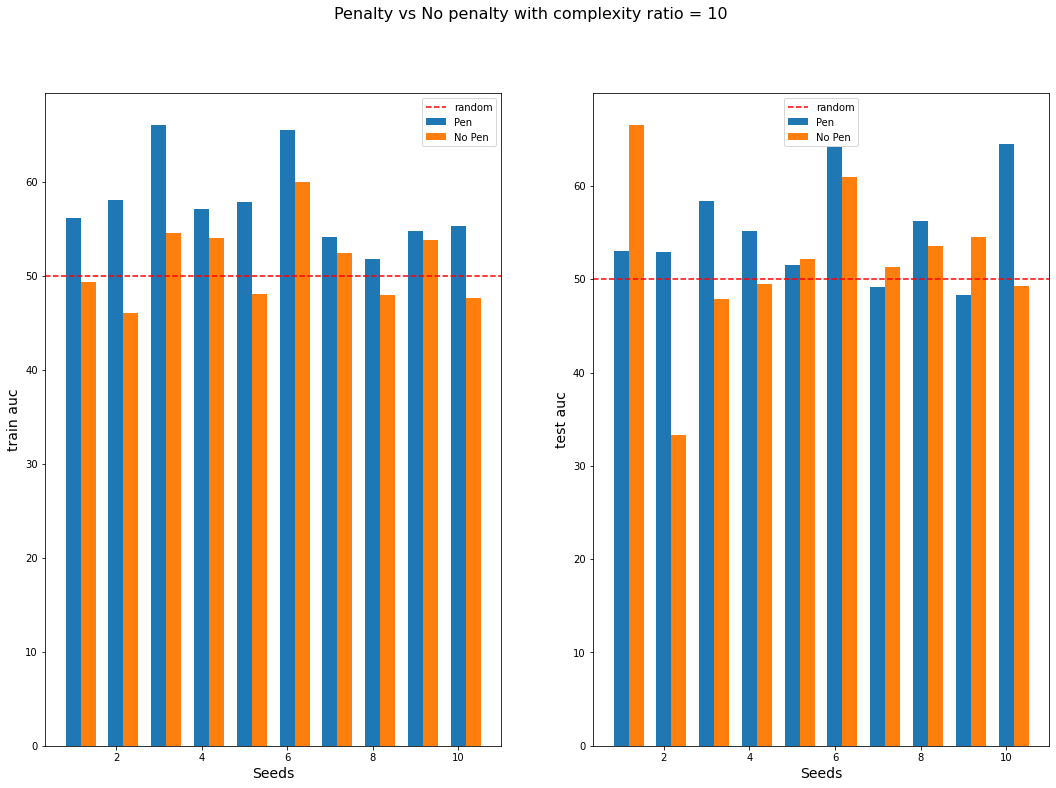

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 12))

fig.suptitle("Penalty vs No penalty with complexity ratio = 10", fontsize=16)

index = np.arange(1, 11)
bar_width = 0.35
ax[0].bar(index, res_2_df["cv_score"]*100, bar_width, label="Pen")
ax[0].bar(index + bar_width, res_1_df["cv_score"]*100, bar_width, label="No Pen")
ax[0].axhline(y=50, color="red", label="random", linestyle="--")
ax[0].set_xlabel("Seeds", fontsize=14)
ax[0].set_ylabel("train auc", fontsize=14)

ax[1].bar(index, res_2_df["test_score"]*100, bar_width, label="Pen")
ax[1].bar(index + bar_width, res_1_df["test_score"]*100, bar_width, label="No Pen")
ax[1].set_xlabel("Seeds", fontsize=14)
ax[1].set_ylabel("test auc", fontsize=14)
ax[1].axhline(y=50, color="red", label="random", linestyle="--")

ax[0].legend()
ax[1].legend()

In [16]:
from notebooks.variable_selection.MosesEstimator import *
from sklearn.model_selection import cross_val_score
import subprocess as subp

i = 0

results_fs_auc = {}
for seed, df in zip(seeds, data_dfs):
    X_s, y_s = df[df.columns.difference(["y"])], df["y"]
    X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, stratify=y_s, shuffle=True, random_state=seed)
    data_train_s = pd.concat([X_s_train, y_s_train], axis=1)
    data_train_s.to_csv(f"data/exps5/data_train_{seed}.csv", index=False)
    cmd = ["asfeature-selection", "-i", f"data/exps5/data_train_{seed}.csv",  "-uy", "-asmd", "-C10", "-o", f"data/exps5/data_train_r_{seed}.csv", "-F", "data/exps5/fs.log"]
    process = subp.Popen(args=cmd, stdout=subp.PIPE, stderr=subp.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        raise RuntimeError(f"MOSES ran into an error with return code {process.returncode}. Here is the stderr output:\n{stderr.decode('utf-8')}")

    data_r = pd.read_csv(f"data/exps5/data_train_r_{seed}.csv")
    cols = [col for col in data_r.columns if col != "y"] + ["y"] # asfeature-selection doesn't output columns in the order its given so fix it here
    data_r = data_r[cols]
    X_r_train, y_r_train = data_r[data_r.columns.difference(["y"])].to_numpy(), data_r["y"].to_numpy()
    X_r_test = X_s_test[cols[:-1]]
    cv_score = np.mean(cross_val_score(MosesEstimator(fs_algo=None, random_state=seed, cols=cols), X_r_train, y_r_train, n_jobs=-1))
    moses_est_r = MosesEstimator(fs_algo=None, random_state=seed, cols=cols).fit(X_r_train, y_r_train)
    # print("Scoring on test dataset")
    test_score = moses_est_r.score(X_r_test.to_numpy(), y_s_test.to_numpy())
    res = {"cv_score": cv_score, "test_score": test_score, "est": moses_est_r}
    print(res)
    results_fs_auc[seed] = res


    i += 1


{'cv_score': 0.6099339123298254, 'test_score': 0.5578087167070217, 'est': MosesEstimator(cols=['f13', 'f30', 'f33', 'f34', 'f39', 'f51', 'f6', 'f68',
                     'f89', 'f94', 'y'],
               fs_algo=None, random_state=82)}
{'cv_score': 0.5292003541002857, 'test_score': 0.38830532212885155, 'est': MosesEstimator(cols=['f13', 'f17', 'f4', 'f40', 'f47', 'f51', 'f63', 'f9',
                     'f93', 'f95', 'y'],
               fs_algo=None, random_state=91)}
{'cv_score': 0.6043678244387293, 'test_score': 0.6593137254901961, 'est': MosesEstimator(cols=['f20', 'f31', 'f34', 'f4', 'f46', 'f60', 'f61', 'f66',
                     'f67', 'f75', 'y'],
               fs_algo=None, random_state=13)}
{'cv_score': 0.5739193497830345, 'test_score': 0.506312292358804, 'est': MosesEstimator(cols=['f11', 'f21', 'f26', 'f3', 'f39', 'f49', 'f56', 'f63',
                     'f71', 'f9', 'y'],
               fs_algo=None, random_state=92)}
{'cv_score': 0.6388261299838469, 'test_score': 0.5

In [17]:
from notebooks.variable_selection.MosesEstimator import *
from sklearn.model_selection import cross_val_score
import subprocess as subp
results_fs_init_auc = {}
i = 0
for seed, df in zip(seeds, data_dfs):
    X_s, y_s = df[df.columns.difference(["y"])], df["y"]
    X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, stratify=y_s, shuffle=True, random_state=seed)

    data_train_s = pd.concat([X_s_train, y_s_train], axis=1)
    data_train_s.to_csv(f"data/exps5/data_train_{seed}.csv", index=False)
    cmd = ["asfeature-selection", "-i", f"data/exps5/data_train_{seed}.csv",  "-uy", "-asmd", "-C10", "-o", f"data/exps5/data_train_r_{seed}.csv", "-F", f"data/exps5/fs_{seed}_init.log"]
    for f in feats[i]:
        cmd.append(f"-ff{f}")
    process = subp.Popen(args=cmd, stdout=subp.PIPE, stderr=subp.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        raise RuntimeError(f"MOSES ran into an error with return code {process.returncode}. Here is the stderr output:\n{stderr.decode('utf-8')}")

    data_r = pd.read_csv(f"data/exps5/data_train_r_{seed}.csv")
    cols = [col for col in data_r.columns if col != "y"] + ["y"] # asfeature-selection doesn't output columns in the order its given so fix it here
    data_r = data_r[cols]
    X_r_train, y_r_train = data_r[data_r.columns.difference(["y"])].to_numpy(), data_r["y"].to_numpy()
    X_r_test = X_s_test[cols[:-1]]
    cv_score = np.mean(cross_val_score(MosesEstimator(fs_algo=None, random_state=seed, cols=cols), X_r_train, y_r_train, n_jobs=-1))
    moses_est_r = MosesEstimator(fs_algo=None, random_state=seed, cols=cols).fit(X_r_train, y_r_train)
    # print("Scoring on test dataset")
    test_score = moses_est_r.score(X_r_test.to_numpy(), y_s_test.to_numpy())
    res = {"cv_score": cv_score, "test_score": test_score, "est": moses_est_r}
    print(res)
    results_fs_init_auc[seed] = res
    i += 1

results_fs_init_auc

{'cv_score': 0.5534948760867175, 'test_score': 0.5172518159806295, 'est': MosesEstimator(cols=['f11', 'f14', 'f22', 'f39', 'f45', 'f48', 'f49', 'f68',
                     'f83', 'f88', 'y'],
               fs_algo=None, random_state=82)}
{'cv_score': 0.6104144114942951, 'test_score': 0.5241596638655462, 'est': MosesEstimator(cols=['f18', 'f22', 'f38', 'f47', 'f54', 'f57', 'f69', 'f77',
                     'f84', 'f93', 'y'],
               fs_algo=None, random_state=91)}
{'cv_score': 0.7549869756907187, 'test_score': 0.5903361344537815, 'est': MosesEstimator(cols=['f18', 'f20', 'f46', 'f52', 'f60', 'f61', 'f66', 'f67',
                     'f76', 'f90', 'y'],
               fs_algo=None, random_state=13)}
{'cv_score': 0.6210203126095923, 'test_score': 0.5176079734219269, 'est': MosesEstimator(cols=['f1', 'f11', 'f12', 'f36', 'f42', 'f56', 'f62', 'f63',
                     'f79', 'f9', 'y'],
               fs_algo=None, random_state=92)}
{'cv_score': 0.6098188629837843, 'test_score':

{82: {'cv_score': 0.5534948760867175,
  'test_score': 0.5172518159806295,
  'est': MosesEstimator(cols=['f11', 'f14', 'f22', 'f39', 'f45', 'f48', 'f49', 'f68',
                       'f83', 'f88', 'y'],
                 fs_algo=None, random_state=82)},
 91: {'cv_score': 0.6104144114942951,
  'test_score': 0.5241596638655462,
  'est': MosesEstimator(cols=['f18', 'f22', 'f38', 'f47', 'f54', 'f57', 'f69', 'f77',
                       'f84', 'f93', 'y'],
                 fs_algo=None, random_state=91)},
 13: {'cv_score': 0.7549869756907187,
  'test_score': 0.5903361344537815,
  'est': MosesEstimator(cols=['f18', 'f20', 'f46', 'f52', 'f60', 'f61', 'f66', 'f67',
                       'f76', 'f90', 'y'],
                 fs_algo=None, random_state=13)},
 92: {'cv_score': 0.6210203126095923,
  'test_score': 0.5176079734219269,
  'est': MosesEstimator(cols=['f1', 'f11', 'f12', 'f36', 'f42', 'f56', 'f62', 'f63',
                       'f79', 'f9', 'y'],
                 fs_algo=None, random_st

In [18]:
results_fs_auc_df = {"seed": [] ,"cv_score": [], "test_score": []}
results_fs_init_auc_df = {"seed": [] ,"cv_score": [], "test_score": []}

for s, v in results_fs_auc.items():
    results_fs_auc_df["seed"].append(s)
    results_fs_auc_df["cv_score"].append(v["cv_score"])
    results_fs_auc_df["test_score"].append(v["test_score"])

for s, v in results_fs_init_auc.items():
    results_fs_init_auc_df["seed"].append(s)
    results_fs_init_auc_df["cv_score"].append(v["cv_score"])
    results_fs_init_auc_df["test_score"].append(v["test_score"])

results_fs_auc_df = pd.DataFrame(results_fs_auc_df)
results_fs_init_auc_df = pd.DataFrame(results_fs_init_auc_df)

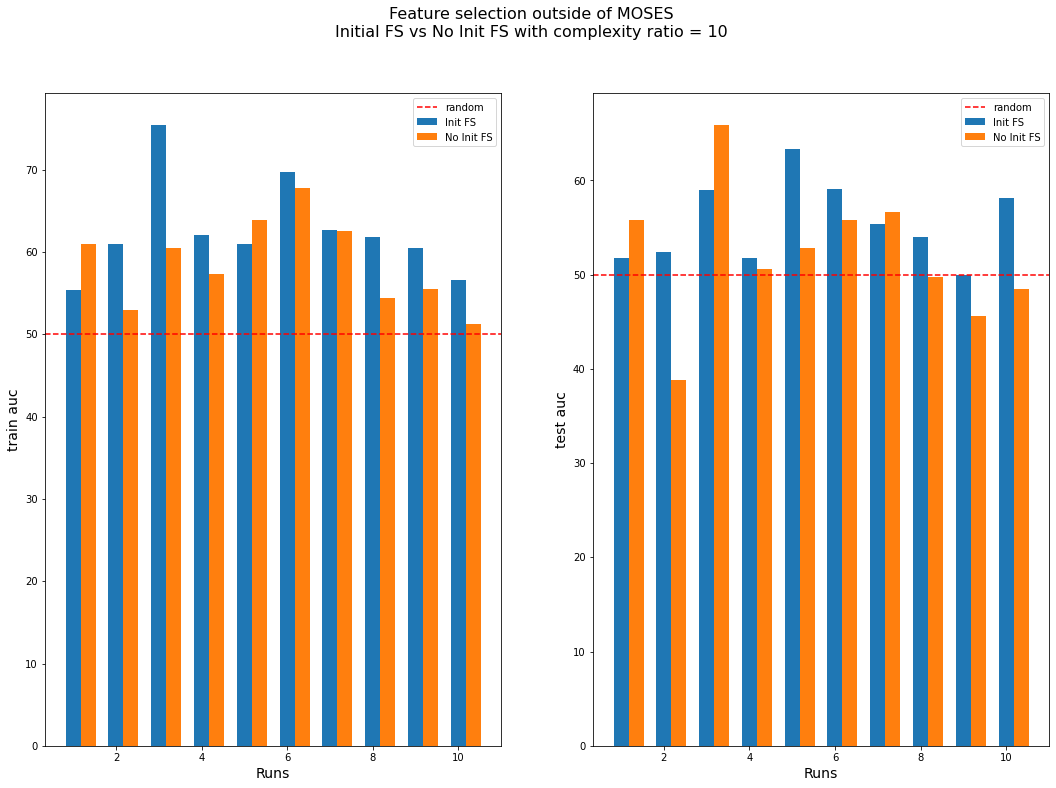

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18, 12))

fig.suptitle("Feature selection outside of MOSES\nInitial FS vs No Init FS with complexity ratio = 10", fontsize=16)

index = np.arange(1, 11)
bar_width = 0.35
ax[0].bar(index, results_fs_init_auc_df["cv_score"]*100, bar_width, label="Init FS")
ax[0].bar(index + bar_width, results_fs_auc_df["cv_score"]*100, bar_width, label="No Init FS")
ax[0].axhline(y=50, color="red", label="random", linestyle="--")
ax[0].set_xlabel("Runs", fontsize=14)
ax[0].set_ylabel("train auc", fontsize=14)

ax[1].bar(index, results_fs_init_auc_df["test_score"]*100, bar_width, label="Init FS")
ax[1].bar(index + bar_width, results_fs_auc_df["test_score"]*100, bar_width, label="No Init FS")
ax[1].set_xlabel("Runs", fontsize=14)
ax[1].set_ylabel("test auc", fontsize=14)
ax[1].axhline(y=50, color="red", label="random", linestyle="--")

ax[0].legend()
ax[1].legend()